<a href="https://colab.research.google.com/github/Violalin-code/Test2/blob/main/Test2_Retry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd

# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
file_path = '/content/Test2 dataset (1).xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to verify the upload
print(df.head())

             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640.0            

In [111]:
# Assuming your DataFrame is named 'df'
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1714
Number of columns: 16


In [112]:
# Get the data types of all columns
data_types = df.dtypes

# Print the data types
print(data_types)

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
print("Numeric columns:", numeric_columns)

# Identify categorical columns (assuming they are of type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Catalyst                       object
Ratio of CH4 in Feed          float64
Reaction Temperature            int64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                            int64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
dtype: object
Numeric columns: Index(['Ratio of CH4 in Feed', 'Reaction Temperature', 'Ni Loading',
       'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area',
       'H2-TPR Peak Temperature', 'Ni Particle Size', 'Ni Dispersion',
       'Modifier Electronegativity', 'GHSV', 'CH4 Conversion',
       'CO2 Conversion', 'Syngas_Ratio'],
      dtype='object')
Categorical columns: Index

In [113]:
#If has missing data, try to target them by seeing where
#Check for missing data
missing_data = df.isnull().sum()
#Display columns with missing data
missing_data[missing_data > 0]

,0
Ni Dispersion,1056
CH4 Conversion,49
CO2 Conversion,77
Syngas_Ratio,76


In [114]:
#Drop rows/columns with missing values:
df['Syngas_Ratio'].fillna(df['Syngas_Ratio'].mean(), inplace=True)
df['CH4 Conversion'].fillna(df['CH4 Conversion'].mean(), inplace=True)
df['CO2 Conversion'].fillna(df['CO2 Conversion'].mean(), inplace=True)

df = df.drop('Ni Dispersion', axis=1)  # Drops rows with missing data

In [115]:
#check that Ni Dispersion has been dropped
missing_data = df.isnull().sum()
#Display columns with missing data
missing_data[missing_data > 0]

,0


In [116]:
#Recheck for missing values in the cleaned dataset
has_missing_values = df_cleaned.isnull().values.any()

if has_missing_values:
    print("Missing values are present in the cleaned dataset.")
else:
    print("No missing values found in the cleaned dataset.")

No missing values found in the cleaned dataset.


In [117]:
import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df_cleaned):
    outliers = {}

    for column in df_cleaned.select_dtypes(include=np.number).columns:  # Corrected here
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers
        is_outlier = ((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)).any()

        if is_outlier:
            outliers[column] = 'Outliers detected'
        else:
            outliers[column] = 'No outliers'

    return outliers

# Detect and print outliers status
outliers_status = detect_outliers_iqr(df_cleaned)  # Ensure you're passing the correct DataFrame
for column, status in outliers_status.items():
    print(f"{column}: {status}")

Ratio of CH4 in Feed: No outliers
Reaction Temperature: Outliers detected
Ni Loading: Outliers detected
Reaction Time: Outliers detected
Pore Size: Outliers detected
Pore Volume: Outliers detected
Surface Area: Outliers detected
H2-TPR Peak Temperature: No outliers
Ni Particle Size: Outliers detected
Modifier Electronegativity: No outliers
GHSV: Outliers detected
CH4 Conversion: No outliers
CO2 Conversion: Outliers detected
Syngas_Ratio: Outliers detected


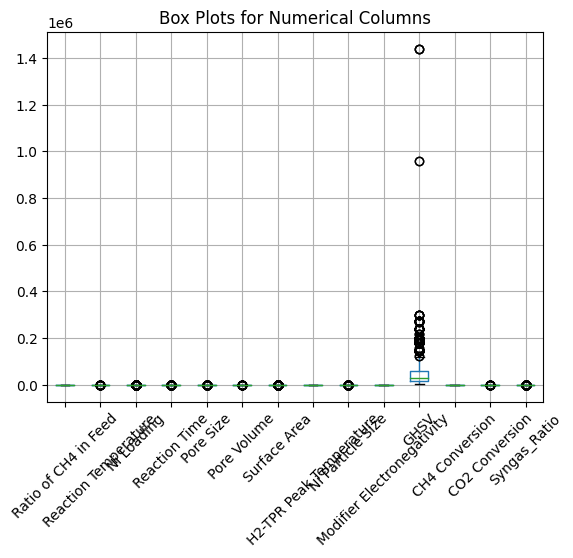

In [118]:
#Create Boxplots to see outliers
import matplotlib.pyplot as plt

df_cleaned.boxplot()
plt.title('Box Plots for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

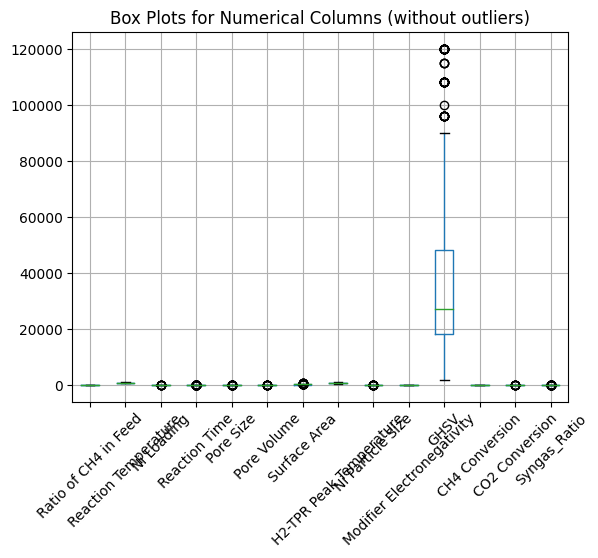

In [119]:
# Identify outliers based on the box plot
outlier_threshold = 1.5
q1 = df_cleaned.select_dtypes(include=np.number).quantile(0.25)
q3 = df_cleaned.select_dtypes(include=np.number).quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - outlier_threshold * iqr
upper_bound = q3 + outlier_threshold * iqr

# Filter out outliers
mask = (df_cleaned.select_dtypes(include=np.number) >= lower_bound) & (df_cleaned.select_dtypes(include=np.number) <= upper_bound)
df_without_outliers = df_cleaned[mask.all(axis=1)]

# Create the box plot without outliers
df_without_outliers.boxplot()
plt.title('Box Plots for Numerical Columns (without outliers)')
plt.xticks(rotation=45)
plt.show()

In [120]:
#Recheck for missing values in the cleaned dataset
has_missing_values = df_cleaned.isnull().values.any()

if has_missing_values:
    print("Missing values are present in the cleaned dataset.")
else:
    print("No missing values found in the cleaned dataset.")

No missing values found in the cleaned dataset.


In [121]:
# Summarize key characteristics of the data without outliers
summary_stats = df_without_outliers.describe().T
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats = summary_stats[['mean', '50%', 'std', 'min', 'max', 'IQR']]
summary_stats.columns = ['Mean', 'Median', 'Standard Deviation', 'Minimum', 'Maximum', 'IQR']

print(summary_stats)

                                    Mean     Median  Standard Deviation  \
Ratio of CH4 in Feed            0.377960      0.470            0.145993   
Reaction Temperature          706.627219    700.000           78.469221   
Ni Loading                      8.405559      9.600            3.605781   
Reaction Time                  12.368509      6.000           14.801945   
Pore Size                      10.144004      8.420            6.161639   
Pore Volume                     0.357597      0.340            0.228648   
Surface Area                  154.629130    140.000          108.488806   
H2-TPR Peak Temperature       626.452101    658.000          168.845417   
Ni Particle Size               10.485868      9.850            5.349312   
Modifier Electronegativity      0.416147      0.000            0.642841   
GHSV                        35529.388560  27000.000        25555.709701   
CH4 Conversion                 63.400551     65.730           22.481787   
CO2 Conversion           

In [122]:
#Checking For Redundant Columns

def get_duplicate_columns(df_without_outliers):
    duplicate_column_names = set()
    for i in range(df_without_outliers.shape[1]):  # Corrected this line
        col = df_without_outliers.iloc[:, i]
        for j in range(i + 1, df_without_outliers.shape[1]):
            other_col = df_without_outliers.iloc[:, j]
            if col.equals(other_col):
                duplicate_column_names.add(df_without_outliers.columns[j])
    return list(duplicate_column_names)

# Find duplicate columns
duplicate_columns = get_duplicate_columns(df_without_outliers)
print("Duplicate columns:", duplicate_columns)

Duplicate columns: []


In [123]:
#See which columns are objects for encoding
categorical_columns = df_without_outliers.select_dtypes(include=['object']).columns

#Display categorical columns
categorical_columns

Index(['Catalyst'], dtype='object')

In [124]:
#Apply one-hot encoding to categorical variables(Catalyst)
#Often used to convert categorical data directly into numerical form for machine learning
df_encoded = pd.get_dummies(df_without_outliers, columns=categorical_columns, drop_first=True)

#Display the first few rows of the enncoded dataset
df_encoded.head()

,Ratio of CH4 in Feed,Reaction Temperature,Ni Loading,Reaction Time,Pore Size,Pore Volume,Surface Area,H2-TPR Peak Temperature,Ni Particle Size,Modifier Electronegativity,...,Catalyst_Y2O3/10Ni/SBA-15,Catalyst_Y–2%Nd2O3,Catalyst_Y–2.5%Nd2O3,Catalyst_Y–3%Nd2O3,Catalyst_Y–3.5%Nd2O3,Catalyst_Y–4%Nd2O,Catalyst_Y–Ni/SBA-16-MgO,Catalyst_Zr (10)-Ni(15)/ perlite,"Catalyst_Zr (20)-Ni(15)/perlite,",Catalyst_–Ni–La2O3
0,0.15,650,10.0,0.500,4.7,0.58,476.0,640.0,2.9,1.96,...,False,False,False,False,False,False,False,False,False,False
1,0.15,650,10.0,0.500,4.7,0.58,476.0,640.0,4.6,1.96,...,False,False,False,False,False,False,False,False,False,False
2,0.15,650,10.0,0.500,5.2,0.58,455.0,457.0,2.9,1.96,...,False,False,False,False,False,False,False,False,False,False
3,0.15,650,10.0,0.500,5.2,0.58,455.0,457.0,4.6,1.96,...,False,False,False,False,False,False,False,False,False,False
5,0.15,800,5.0,4.167,20.9,0.62,128.7,782.0,6.2,0.00,...,False,False,False,False,False,False,False,False,False,False


In [125]:
#Assuming 'target_column' is the name of your target variable

#Shows the first few rows of the features
X = df_encoded.drop('Syngas_Ratio', axis=1)
#Shows the first few values of the target variable
y = df_encoded['Syngas_Ratio']

#Display the first few rows of X and Y
X.head(), y.head()

(   Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
 0                  0.15                   650        10.0          0.500   
 1                  0.15                   650        10.0          0.500   
 2                  0.15                   650        10.0          0.500   
 3                  0.15                   650        10.0          0.500   
 5                  0.15                   800         5.0          4.167   
 
    Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
 0        4.7         0.58         476.0                    640.0   
 1        4.7         0.58         476.0                    640.0   
 2        5.2         0.58         455.0                    457.0   
 3        5.2         0.58         455.0                    457.0   
 5       20.9         0.62         128.7                    782.0   
 
    Ni Particle Size  Modifier Electronegativity  ...  \
 0               2.9                        1.96  ...   
 1    

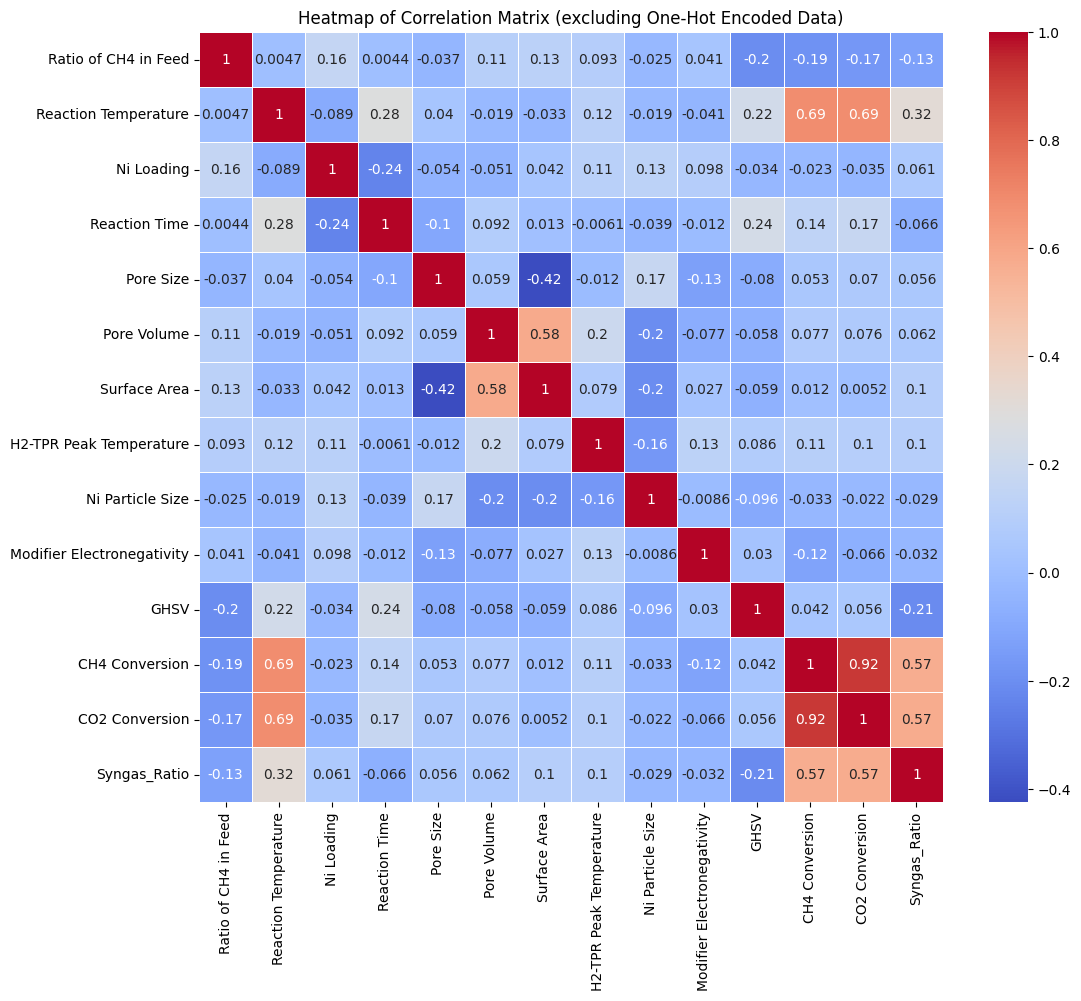

In [127]:
import seaborn as sns

df_clean = df_without_outliers.drop(['Catalyst'], axis=1)

#plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of Correlation Matrix (excluding One-Hot Encoded Data)')
plt.show()

#There is a high correlation between CH₄ Conversion, CO₂ Conversion, and Syngas Ratio.
#There is also a slight correlation between the reactuion temperature and CH₄ Conversion and CO₂ Conversion

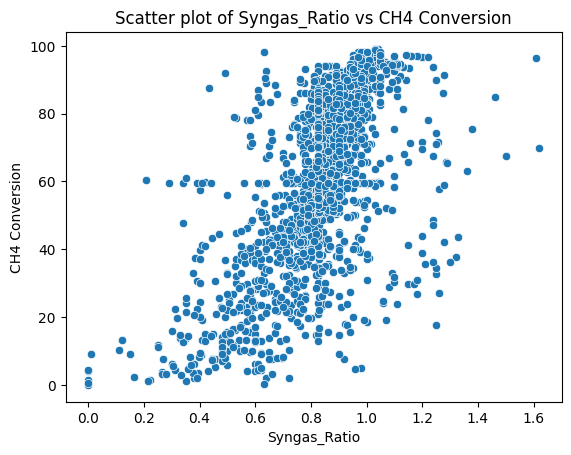

R-squared value: -116373.9883476284


In [105]:
# Scatter plot for continuous variables
sns.scatterplot(x='Syngas_Ratio', y='CH4 Conversion', data=df)
plt.title('Scatter plot of Syngas_Ratio vs CH4 Conversion')
plt.show()

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(df['Syngas_Ratio'],df['CH4 Conversion'])

print(f"R-squared value: {r_squared}")

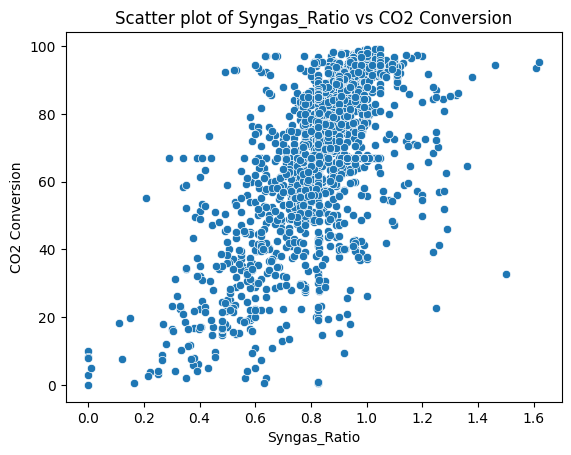

R-squared value: -139845.6434154493


In [107]:
# Scatter plot for continuous variables
sns.scatterplot(x='Syngas_Ratio', y='CO2 Conversion', data=df)
plt.title('Scatter plot of Syngas_Ratio vs CO2 Conversion')
plt.show()

# Calculate R-squared
r_squared = r2_score(df['Syngas_Ratio'],df['CO2 Conversion'])

print(f"R-squared value: {r_squared}")

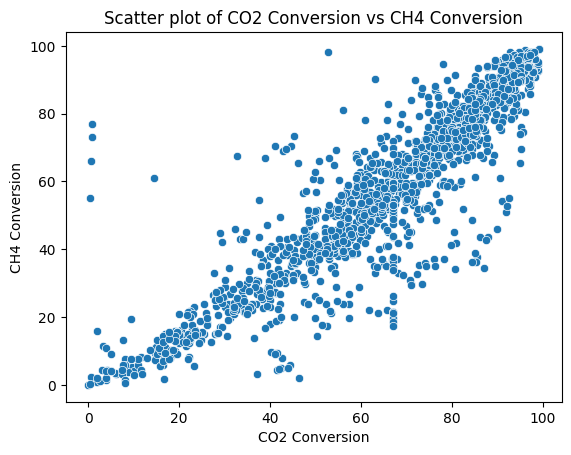

R-squared value: 0.7361170458185277


In [129]:
# Scatter plot for continuous variables
sns.scatterplot(x='CO2 Conversion', y='CH4 Conversion', data=df)
plt.title('Scatter plot of CO2 Conversion vs CH4 Conversion')
plt.show()

# Calculate R-squared
r_squared = r2_score(df['CH4 Conversion'],df['CO2 Conversion'])

print(f"R-squared value: {r_squared}")

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Identify pairs of highly correlated variables
threshold = 0.9
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("\nHighly Correlated Pairs (threshold = 0.9):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

#Combining highly correlated variables
# Standardize the data
numeric_df = df.select_dtypes(include=[float, int])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

#Drop rows with NaN values before scaling
numeric_df =numeric_df.dropna()
scale_data = scaler.fit_transform(numeric_df)

# Apply PCA to reduce multicollinearity
pca = PCA(n_components=len(numeric_df.columns))
pca.fit(scaled_data)

# Check explained variance to decide how many components to keep
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)

# You can choose to keep a certain number of components that explain most variance
# For example, keep components explaining 95% of variance
cumulative_variance = explained_variance.cumsum()
n_components_to_keep = next(i for i, total_var in enumerate(cumulative_variance) if total_var > 0.95) + 1

# Transform data using the chosen number of components
df_pca = pca.transform(scaled_data)[:, :n_components_to_keep]

print(f"Reduced data using {n_components_to_keep} principal components.")

#Reiterates that the CO2 Conversion and CH4 Conversion: 0.91 are highly correlated

Correlation Matrix:
                             Ratio of CH4 in Feed  Reaction Temperature  \
Ratio of CH4 in Feed                    1.000000              0.042877   
Reaction Temperature                    0.042877              1.000000   
Ni Loading                              0.069500             -0.043081   
Reaction Time                          -0.028092              0.252815   
Pore Size                              -0.004645             -0.021182   
Pore Volume                             0.042344             -0.014078   
Surface Area                            0.079162             -0.005833   
H2-TPR Peak Temperature                -0.010308              0.097387   
Ni Particle Size                       -0.054405              0.047700   
Modifier Electronegativity             -0.022700             -0.009668   
GHSV                                   -0.090410              0.094654   
CH4 Conversion                         -0.155200              0.683621   
CO2 Conversion   

The overall conclusion to this dataset is that there is a high correlation betweeen CO2 Conversion and CH4 Conversion. It doesn't seem like the Syngas_Ratio is affecting the CO2 Conversion and CH4 Conversion too much as the correlation is 0.6, which is not consider high pairs as its threshold.